## Modelling the data
Only simple RNN, GRU and LSTM for now...

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

seed = 777
np.random.seed(seed)

# Setting the GPU up.
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(f'Found GPU at: {device_name}')

Found GPU at: /device:GPU:0


In [14]:
np.set_printoptions(precision=None, suppress=True)
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(gpu_devices)
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1)
LSTM_performance = np.zeros((3,1))
GRU_performance = np.zeros((3,1))
RNN_performance = np.zeros((3,1))

for data in ['len_5.npz', 'len_10.npz', 'len_15.npz', 'len_20.npz']:
    feature_set = np.load(data, allow_pickle = True)
    for feature in feature_set['arr_0']:
        X_train, y_train, X_val, y_val, X_test, y_test = feature
        
        LSTM_model = tf.keras.models.Sequential()
        LSTM_model.add(tf.keras.layers.LSTM(1, input_shape=(X_train.shape[1], X_train.shape[2])))
        LSTM_model.compile(loss='mae', optimizer='adam')
        
        history = LSTM_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stopping])
        
        performance = np.array([history.history['loss'][-1], history.history['val_loss'][-1],\
                                mean_absolute_error(y_true = y_test, y_pred = LSTM_model.predict(X_test))])
        LSTM_performance = np.append(LSTM_performance, performance.reshape((3,1)), axis = 1)
        print("LSTM performance", performance)
        
        GRU_model = tf.keras.models.Sequential()
        GRU_model.add(tf.keras.layers.GRU(1, input_shape=(X_train.shape[1], X_train.shape[2])))
        GRU_model.compile(loss='mae', optimizer='adam')

        history = GRU_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stopping])
        
        performance = np.array([history.history['loss'][-1], history.history['val_loss'][-1],\
                                mean_absolute_error(y_true = y_test, y_pred = GRU_model.predict(X_test))])
        GRU_performance = np.append(GRU_performance, performance.reshape((3,1)), axis = 1)
        print("GRU performance", performance)
        
        RNN_model = tf.keras.models.Sequential()
        RNN_model.add(tf.keras.layers.SimpleRNN(1, input_shape=(X_train.shape[1], X_train.shape[2])))
        RNN_model.compile(loss='mae', optimizer='adam')
        
        history = RNN_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0, callbacks=[early_stopping])
        
        performance = np.array([history.history['loss'][-1], history.history['val_loss'][-1],\
                                mean_absolute_error(y_true = y_test, y_pred = RNN_model.predict(X_test))])
        RNN_performance = np.append(RNN_performance, performance.reshape((3,1)), axis = 1)
        print("RNN performance", performance)
        

LSTM performance [0.00057503 0.00069178 0.05326847]
GRU performance [0.00041449 0.00046188 0.02063311]
RNN performance [0.00065487 0.00080785 0.03870938]
LSTM performance [0.00045671 0.00071575 0.05017431]
GRU performance [0.00070266 0.00089384 0.06447998]
RNN performance [0.00076014 0.00092868 0.02188781]
LSTM performance [0.00071569 0.00146946 0.04663566]
GRU performance [0.00055242 0.00065052 0.01853566]
RNN performance [0.00056969 0.00063076 0.03228565]
LSTM performance [0.00092306 0.00181045 0.04686391]
GRU performance [0.00189654 0.00180809 0.02478022]
RNN performance [0.00472771 0.0077375  0.04076413]
LSTM performance [0.00071882 0.00083743 0.07168563]
GRU performance [0.00135931 0.00299745 0.06469355]
RNN performance [0.00154823 0.00182933 0.03218242]
LSTM performance [0.00056915 0.0006676  0.05663262]
GRU performance [0.00054351 0.00055342 0.01858716]
RNN performance [0.00043944 0.00055956 0.01422955]
LSTM performance [0.00047679 0.00065448 0.07758546]
GRU performance [0.00065

In [5]:
train = np.load('len_5.npz', allow_pickle = True)
train['arr_0'].shape

(5, 6)

In [40]:
LSTM_train_len5 = LSTM_performance[0,1:6]
LSTM_train_len10 = LSTM_performance[0,6:11]
LSTM_train_len15 = LSTM_performance[0,11:16]
LSTM_train_len20 = LSTM_performance[0,16:]
LSTM_val_len5 = LSTM_performance[1,1:6]
LSTM_val_len10 = LSTM_performance[1,6:11]
LSTM_val_len15 = LSTM_performance[1,11:16]
LSTM_val_len20 = LSTM_performance[1,16:]
LSTM_test_len5 = LSTM_performance[2,1:6]
LSTM_test_len10 = LSTM_performance[2,6:11]
LSTM_test_len15 = LSTM_performance[2,11:16]
LSTM_test_len20 = LSTM_performance[2,16:]

GRU_train_len5 = GRU_performance[0,1:6]
GRU_train_len10 = GRU_performance[0,6:11]
GRU_train_len15 = GRU_performance[0,11:16]
GRU_train_len20 = GRU_performance[0,16:]
GRU_val_len5 = GRU_performance[1,1:6]
GRU_val_len10 = GRU_performance[1,6:11]
GRU_val_len15 = GRU_performance[1,11:16]
GRU_val_len20 = GRU_performance[1,16:]
GRU_test_len5 = GRU_performance[2,1:6]
GRU_test_len10 = GRU_performance[2,6:11]
GRU_test_len15 = GRU_performance[2,11:16]
GRU_test_len20 = GRU_performance[2,16:]

RNN_train_len5 = RNN_performance[0,1:6]
RNN_train_len10 = RNN_performance[0,6:11]
RNN_train_len15 = RNN_performance[0,11:16]
RNN_train_len20 = RNN_performance[0,16:]
RNN_val_len5 = RNN_performance[1,1:6]
RNN_val_len10 = RNN_performance[1,6:11]
RNN_val_len15 = RNN_performance[1,11:16]
RNN_val_len20 = RNN_performance[1,16:]
RNN_test_len5 = RNN_performance[2,1:6]
RNN_test_len10 = RNN_performance[2,6:11]
RNN_test_len15 = RNN_performance[2,11:16]
RNN_test_len20 = RNN_performance[2,16:]

LSTM_df = pd.DataFrame(np.array([LSTM_train_len5, LSTM_val_len5, LSTM_test_len5, LSTM_train_len10, LSTM_val_len10,LSTM_test_len10, LSTM_train_len15,\
                       LSTM_val_len15, LSTM_test_len15, LSTM_train_len20, LSTM_val_len20, LSTM_test_len20]).T)
GRU_df = pd.DataFrame(np.array([GRU_train_len5, GRU_val_len5, GRU_test_len5, GRU_train_len10, GRU_val_len10,GRU_test_len10, GRU_train_len15,\
                       GRU_val_len15, GRU_test_len15, GRU_train_len20, GRU_val_len20, GRU_test_len20]).T)
RNN_df = pd.DataFrame(np.array([RNN_train_len5, RNN_val_len5, RNN_test_len5, RNN_train_len10, RNN_val_len10,RNN_test_len10, RNN_train_len15,\
                       RNN_val_len15, RNN_test_len15, RNN_train_len20, RNN_val_len20, RNN_test_len20]).T)

In [45]:
round(LSTM_df,5).to_csv("LSTM_df.csv")
round(GRU_df,5).to_csv("GRU_df.csv")
round(RNN_df,5).to_csv("RNN_df.csv")

In [23]:
average_model_performance = [LSTM_performance[0].mean(), LSTM_performance[1].mean(), LSTM_performance[2].mean(),\
                             GRU_performance[0].mean(), GRU_performance[1].mean(), GRU_performance[2].mean(),\
                             RNN_performance[0].mean(), RNN_performance[1].mean(), RNN_performance[2].mean()]

plt.chart(average_model_performance)

AttributeError: module 'matplotlib.pyplot' has no attribute 'chart'

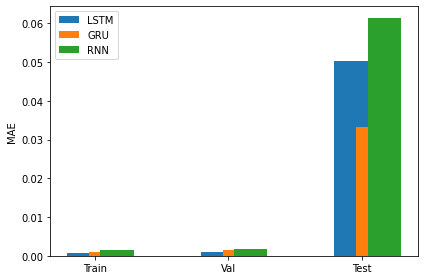

In [28]:
n_groups = 3
LSTM = [LSTM_performance[0].mean(), LSTM_performance[1].mean(), LSTM_performance[2].mean()]
GRU = [GRU_performance[0].mean(), GRU_performance[1].mean(), GRU_performance[2].mean()]
RNN = [RNN_performance[0].mean(), RNN_performance[1].mean(), RNN_performance[2].mean()]


labels = ["Train", "Val", "Test"]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, LSTM, width, label='LSTM')
rects2 = ax.bar(x + width/3, GRU, width, label='GRU')
rects3 = ax.bar(x + 2 * width/3, RNN, width, label='RNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.savefig("Model_Comp.pdf")